# Inspect the Templates (after GenerateTemplates script is run)

After running the template creator script, I can inspect the templates and run RSA-style analyses. 


In [6]:
import numpy as np
import deepdish as dd
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from _classification_util import GetTemplates
from _mempal_util import subject_ids


### function for spatial intersubject correlation

In [2]:
def RunLOO_SpatialISC_bySubj(template_in,plot=True):
    
    '''
    runs spatial ISC with leave one out. returns 23x23x25(subj) (hardcoded)
    
    templates are ordered by the default ordering so templates are consistent for all subjects.
    
    '''

#     template_in = templates[run_i][betatype][hem]
    spatial_isc = np.zeros((23,23,len(subject_ids)))
    for si in range(len(subject_ids)):

        loo = template_in[:,:,si]
        group = template_in[:,:,np.arange(len(subject_ids))!=si].mean(2)

        spatial_isc[:,:,si] = np.corrcoef(loo.T,group.T)[:23,23:] 
        
        
    if plot==True:
        plt.imshow(spatial_isc.mean(2),aspect='auto');plt.colorbar();
    else:
        print()
    
    return spatial_isc 

### across subjects, room spatial patterns in V1 seem relatively differentiable

dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
['RV1']
dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
RV1


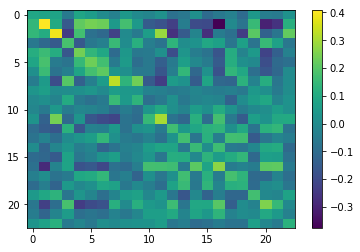

In [67]:
### Show Spatial ISC for Visual Cortex (notice diagonal)

roi = 'V1'
roi_id = 9999
hem = 'R'
betatype = 'rooms'
runs = ['RV1'] # room video 1

###
### GRAB TEMPLATES
###

template_dir = '../PythonData2024/Output/templates'

# date = 20230802 
date = 20240108

templates, valid_verts = GetTemplates(date,runs,roi,roi_id, hem, template_dir)

isc = RunLOO_SpatialISC_bySubj(templates['RV1']['rooms']['R'])

# print(isc.shape)

# plt.imshow(isc.mean(2));plt.colorbar();

### across subjects, object spatial patterns in V1 seem relatively differentiable

dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
['ROV1']
dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
ROV1


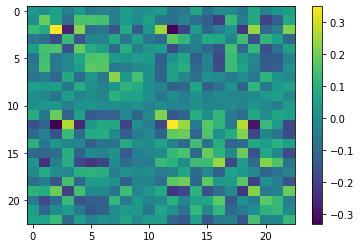

In [7]:
### Show Spatial ISC for Visual Cortex (notice diagonal)

roi = 'V1'
roi_id = 9999
hem = 'R'
betatype = 'objects'
runs = ['ROV1'] # room video 1

###
### GRAB TEMPLATES
###

template_dir = '../PythonData2024/Output/templates'

# date = 20230802 
date = 20240108

templates, valid_verts = GetTemplates(date,runs,roi,roi_id, hem, template_dir)

isc = RunLOO_SpatialISC_bySubj(templates[runs[0]]['rooms']['R'])

# print(isc.shape)

# plt.imshow(isc.mean(2));plt.colorbar();

dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
['RV1']
dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
RV1


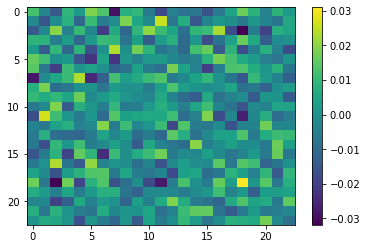

In [13]:
### IMPORT NEW TEMPLATES

roi = 'phippo'
roi_id = 9999
hem = 'None'
betatype = 'rooms'
runs = ['RV1']

###
### GRAB TEMPLATES
###

template_dir = '../PythonData2024/Output/templates'
date = 20230802 
date = 20240108


templates,valid_verts = GetTemplates(date,runs,roi,roi_id, hem, template_dir)

isc = RunLOO_SpatialISC_bySubj(templates['RV1']['rooms'][hem])
# print(isc.shape)

# plt.imshow(isc.mean(2));plt.colorbar();

### posterior hippocampus spatial ISC for object video

dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
['ROV1']
dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
ROV1


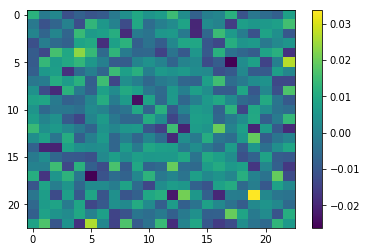

In [63]:
### IMPORT NEW TEMPLATES

roi = 'phippo'
roi_id = 9999
hem = 'None'
betatype = 'objects'
runs = ['ROV1']

###
### GRAB TEMPLATES
###

template_dir = '../PythonData2024/Output/templates'
date = 20230802 
date = 20240108


templates,valid_verts = GetTemplates(date,runs,roi,roi_id, hem, template_dir)

isc = RunLOO_SpatialISC_bySubj(templates[runs[0]]['rooms'][hem])
# print(isc.shape)

# plt.imshow(isc.mean(2));plt.colorbar();

### random searchlight room patterns

dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
['RV1']
dict_keys(['PV1', 'PV2', 'ROV1', 'ROV1+ROV2', 'ROV2', 'RV1', 'RV1+RV2', 'RV1+RV2+PV1', 'RV2'])
RV1


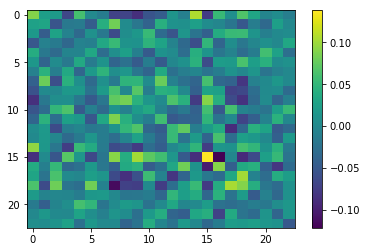

In [61]:
roi = 'SL'
roi_id = 234 #random
hem = 'L'
betatype = 'rooms'
runs = ['RV1']

###
### GRAB TEMPLATES
###

template_dir = '../PythonData2024/Output/templates'
date = 20230802 
date = 20240108

templates,valid_verts = GetTemplates(date,runs,roi,roi_id, hem, template_dir)

isc = RunLOO_SpatialISC_bySubj(templates['RV1']['rooms'][hem])

# print(isc.shape)
# plt.imshow(isc.mean(2));plt.colorbar();